In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
def make_summary_df(scope): 
    summary_rows = []
    for i in range(1, 7):
        file = f's{i}_results.csv'
        df = pd.read_csv(file)
        
        # Filter for 'whole model'
        df = df[df['area'] == scope]
        
        # Extract values by result name
        co2_t = df.loc[df['result_name'] == 'co2', 'value'].values[0]
        nox_g = df.loc[df['result_name'] == 'NOX', 'value'].values[0]
        pm2p5_g = df.loc[df['result_name'] == 'PM2.5', 'value'].values[0]
        pm10_g = df.loc[df['result_name'] == 'PM10', 'value'].values[0]
        logistic_km = df.loc[df['result_name'] == 'logistic movements', 'value'].values[0]
        
        # Append to list
        summary_rows.append({
            'scenario': f's{i}',
            'co2_t': co2_t,
            'nox_g': nox_g,
            'pm2p5_g': pm2p5_g,
            'pm10_g': pm10_g,
            'logisticMovements_km': logistic_km
        })

    # Create summary DataFrame
    return pd.DataFrame(summary_rows)

def plot_results(summary_df): 
    # Set up subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Chart 1: CO2
    axes[0].bar(summary_df['scenario'], summary_df['co2_t'], color='tab:red')
    axes[0].set_title('CO2 Emissions (t)')
    axes[0].set_ylabel('tons')

    # Chart 2: NOx
    axes[1].bar(summary_df['scenario'], summary_df['nox_g'], color='tab:green')
    axes[1].set_title('NOx Emissions (g)')

    # Chart 3: PM2.5 and PM10
    x = range(len(summary_df))
    width = 0.35
    axes[2].bar([i - width/2 for i in x], summary_df['pm2p5_g'], width=width, label='PM2.5', color='tab:blue')
    axes[2].bar([i + width/2 for i in x], summary_df['pm10_g'], width=width, label='PM10', color='tab:orange')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(summary_df['scenario'])
    axes[2].set_title('PM2.5 and PM10 Emissions (g)')
    axes[2].legend()

    # Format all y-axes with scientific notation if needed
    for ax in axes:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax.set_xlabel('Scenario')

    plt.tight_layout()
    plt.show()

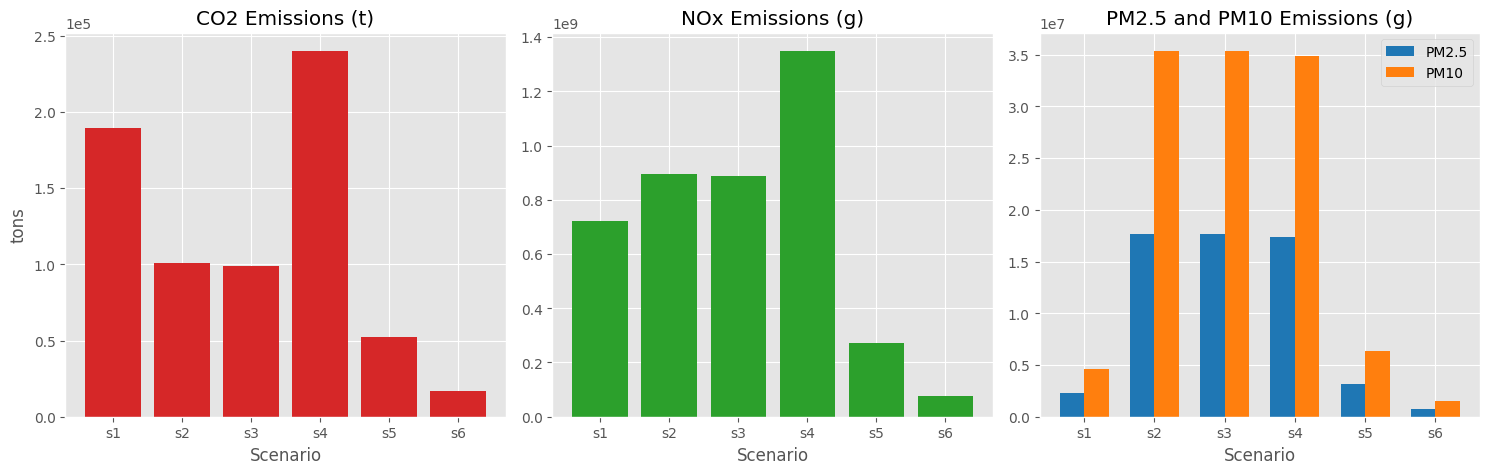

In [60]:
df = make_summary_df('whole model')
plot_results(df)

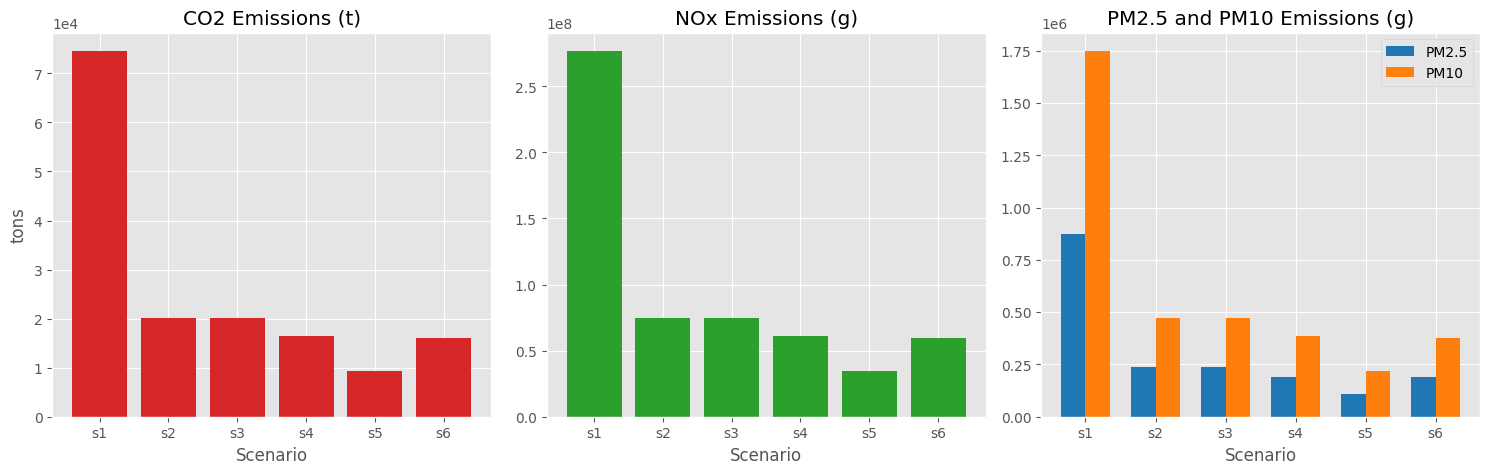

In [61]:
df = make_summary_df('MRA')
plot_results(df)